# Tutorial for Tests other than MGC

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline

## Simulations

First, import the simultions utilizing the import statement below (for this tutorial only 4 out of 20 were imported):

In [2]:
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, w_sim, spiral_sim

Simultions are randomly generated with an $x$ which is $(n\cdot d)$ and $y$ which is $(n\cdot 1)$ that have 2 required parameters: `num_samp` or the number of samples, and `num_dim` or the number of dimensions. Optional parameters can be set based on the readme. Visualizations of the 4 simulations imported above are shown below with and without the noise:

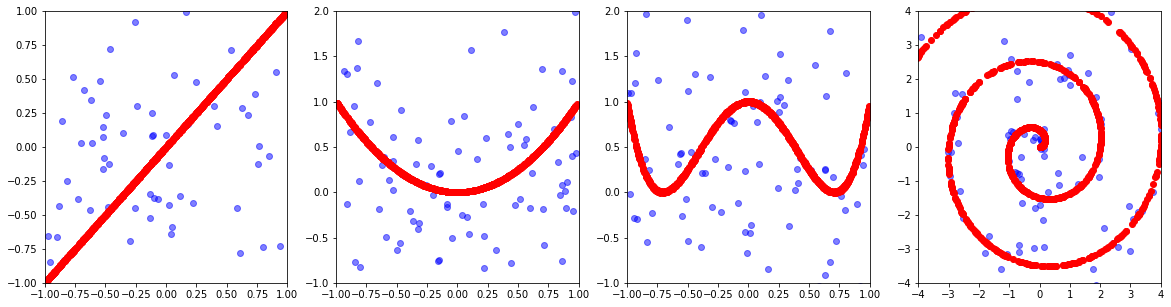

In [3]:
fig, ax = plt.subplots(1, 4, num=1, figsize=(20,5))

x_normal, y_normal = linear_sim(100, 1)
x_no_noise, y_no_noise = linear_sim(1000, 1, noise=0)
ax[0].plot(x_normal, y_normal, 'bo', alpha=0.5)
ax[0].plot(x_no_noise, y_no_noise, 'ro')
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-1, 1])

x_normal, y_normal = quad_sim(100, 1)
x_no_noise, y_no_noise = quad_sim(1000, 1, noise=0)
ax[1].plot(x_normal, y_normal, 'bo', alpha=0.5)
ax[1].plot(x_no_noise, y_no_noise, 'ro')
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-1, 2])

x_normal, y_normal = w_sim(100, 1)
x_no_noise, y_no_noise = w_sim(1000, 1, noise=0)
ax[2].plot(x_normal, y_normal, 'bo', alpha=0.5)
ax[2].plot(x_no_noise, y_no_noise, 'ro')
ax[2].set_xlim([-1, 1])
ax[2].set_ylim([-1, 2])

x_normal, y_normal = spiral_sim(100, 1)
x_no_noise, y_no_noise = spiral_sim(1000, 1, noise=0)
ax[3].plot(x_normal, y_normal, 'bo', alpha=0.5)
ax[3].plot(x_no_noise, y_no_noise, 'ro')
ax[3].set_xlim([-4, 4])
ax[3].set_ylim([-4, 4])

plt.show()

## DCorr, MCorr, Mantel

First, import the `DCorr` class from the mgcpy package:

In [4]:
from mgcpy.independence_tests.dcorr import DCorr

ModuleNotFoundError: No module named 'mgcpy.independence_tests.mgc.distance_transform'

### DCorr

Put description here...

As with the other tests, simply create an `DCorr` object with `'dcorr'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the Dcorr's test statistic from that data:

In [ ]:
x, y = quad_sim(100, 1)

dcorr = DCorr(which_test='dcorr')
test_stat = dcorr.test_statistic(x, y)[0]
print("DCorr's test statistic: %.2f" % test_stat)

P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [ ]:
p_value = dcorr.p_value(x, y)[0]
print("DCorr p-value: %.2f" % p_value)

### MCorr

Put description here...

As with the other tests, simply create an `DCorr` object with `'mcorr'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the MCorr's test statistic from that data:

In [ ]:
x, y = quad_sim(100, 1)

mcorr = DCorr(which_test='mcorr')
test_stat = mcorr.test_statistic(x, y)[0]
print("MCorr's test statistic: %.2f" % test_stat)

P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [ ]:
p_value = mcorr.p_value(x, y)[0]
print("MCorr p-value: %.2f" % p_value)

### Mantel

Put description here...

As with the other tests, simply create an `DCorr` object with `'mantel'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the Mantel's test statistic from that data:

In [ ]:
x, y = quad_sim(100, 1)

mantel = DCorr(which_test='mantel')
test_stat = mantel.test_statistic(x, y)[0]
print("Mantel's test statistic: %.2f" % test_stat)

P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [ ]:
p_value = mantel.p_value(x, y)[0]
print("Mantel p-value: %.2f" % p_value)

## HHG

The HHG test statistic was developed as specified in Heller, et. al. (2012). For more information about the test statistic, refer to the documentation specified in the R package here: https://cran.r-project.org/web/packages/HHG/vignettes/HHG.html.

Essentially, the test takes the distance between two points, $P_{0}$ and $P_{1}$, and calculates how far each of the other data points in the data set are from $P_{0}$ and $P_{1}$ and organizes it in the following table:
<table>
  <tr>
    <th style="width:200px"><center></center></th>
    <th style="width:200px"><center>$d_{y}(P_{0},\cdot) \leq d_{y}(P_{0},P_{1})$</center></th> 
    <th style="width:200px"><center>$d_{y}(P_{0},\cdot) > d_{y}(P_{0},P_{1})$</center></th>
    <th style="width:200px"><center></center></th>
  </tr>
  <tr>
    <th style="width:200px"><center>$d_{x}(P_{0},\cdot) \leq d_{x}(P_{0},P_{1})$</center></th>
    <td style="width:200px"><center>$A_{11}(P_{0}, P_{1})$</center></td> 
    <td style="width:200px"><center>$A_{12}(P_{0}, P_{1})$</center></td>
    <th style="width:200px"><center>$A_{1\cdot}(P_{0}, P_{1})$</center></th>
  </tr>
  <tr>
    <th style="width:200px"><center>$d_{x}(P_{0},\cdot) > d_{x}(P_{0},P_{1})$</center></th>
    <td style="width:200px"><center>$A_{21}(P_{0}, P_{1})$</center></td> 
    <td style="width:200px"><center>$A_{22}(P_{0}, P_{1})$</center></td>
    <th style="width:200px"><center>$A_{2\cdot}(P_{0}, P_{1})$</center></th>
  </tr>
  <tr>
    <th style="width:200px"><center></center></th>
    <th style="width:200px"><center>$A_{\cdot 1}(P_{0}, P_{1})$</center></td> 
    <th style="width:200px"><center>$A_{\cdot 2}(P_{0}, P_{1})$</center></td>
    <th style="width:200px"><center>$N-2$</center></th>
  </tr>
</table>

A Chi square test statistic is then computed from table and the HHG test statistic is simply the sum of all the test statistics calculated:

$$S(i, j)=\frac{(N-2)(A_{12}A_{21}-A_{11}A_{22})}{A_{1\cdot}A_{2\cdot}A_{\cdot 1}A_{\cdot 2}}$$

$$T=\sum_{i=1}^{N}\sum_{j=1, i \neq j}^{N}S(i, j)$$

First, import the `HHG` class from the mgcpy package:

In [23]:
from mgcpy.independence_tests.hhg import HHG

As with the other tests, simply create an `HHG` object and then call the test statistic method. This is done below, by utilizing a simulation and calculating the HHG test statistic from that data:

In [24]:
x, y = w_sim(10, 1)

hhg = HHG()
test_stat = hhg.test_statistic(x, y)[0]
print("HHG test statistic: %.2f" % test_stat)

HHG test statistic: 36.88


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [25]:
p_value = hhg.p_value(x, y)[0]
print("HHG p-value: %.2f" % p_value)

HHG p-value: 0.92


## Kendall, Spearman

First, import the `KendallSpearman` class from the mgcpy package. Note that these tests utilize the `scipy.stats` implementation of the kendall and spearman tests and were included out of convenience:

In [26]:
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

### Kendall

The Kendall tau coefficient was calculated utilizing the `scipy.stats` implementation. Further explanation this test can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html. <b>Note: The inputs for this test must be 1 dimensional.</b>

As with the other tests, simply create an `KendallSpearman` object with `'kendall'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the Kendall's test statistic from that data:

In [27]:
x, y = quad_sim(100, 1)

kendall = KendallSpearman(which_test='kendall')
test_stat = kendall.test_statistic(x, y)[0]
print("Kendall's test statistic: %.2f" % test_stat)

Kendall's test statistic: -0.05


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [28]:
p_value = kendall.p_value(x, y)[0]
print("Pearson's p-value: %.2f" % p_value)

Pearson's p-value: 0.74


### Spearman

The Spearman rho coefficient was calculated utilizing the `scipy.stats` implementation. Further explanation this test can be found here: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html. <b>Note: The inputs for this test must be 1 dimensional.</b>

As with the other tests, simply create an `KendallSpearman` object with `'spearman'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the Spearman's test statistic from that data:

In [29]:
x, y = spiral_sim(100, 1)

spearman = KendallSpearman(which_test='spearman')
test_stat = spearman.test_statistic(x, y)[0]
print("Spearman's test statistic: %.2f" % test_stat)

Spearman's test statistic: 0.09


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [30]:
p_value = spearman.p_value(x, y)[0]
print("Pearson's p-value: %.2f" % p_value)

Pearson's p-value: 0.15


## Pearson's, RV, and CCA

First, import the `RVCorr` class from the mgcpy package:

In [31]:
from mgcpy.independence_tests.rv_corr import RVCorr

### Pearson's

$\newcommand{\cov}{\mathrm{cov}}$The Pearson's correlation was calculated utilizing the `scipy.stats` implementation. Further explanation this test can be found here: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html.

This is a test returns a statistic between -1 and 1 and measures the linear correlation between two vectors. <b>Note: The inputs for this test must be 1 dimensional.</b>

The correlation is calculated via the following formula:

$$\rho _{X, Y}=\frac{\cov(X, Y)}{\sigma _{X}\sigma _{Y}}$$

where $\cov$ is the covariance, $\sigma _{X}$ is the standard deviation of $X$, and $\sigma _{Y}$ is the standard deviation of $Y$.

As with the other tests, simply create an `RVCorr` object with `'pearson'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the Pearson's test statistic from that data:

In [32]:
x, y = linear_sim(100, 1)

pearson = RVCorr(which_test='pearson')
test_stat = pearson.test_statistic(x, y)[0]
print("Pearson's test statistic: %.2f" % test_stat)

Pearson's test statistic: 0.46


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [33]:
p_value = pearson.p_value(x, y)[0]
print("Pearson's p-value: %.2f" % p_value)

Pearson's p-value: 0.00


### RV

$\newcommand{\COVV}{\mathrm{COVV}}$$\newcommand{\Tr}{\mathrm{Tr}}$$\newcommand{\VAV}{\mathrm{VAV}}$$\newcommand{\RV}{\mathrm{RV}}$This test is essentially the a multivariate generalization of the square pearson's correlation coefficient. It returns values between 0 and 1. If $X$ and $Y$ are matrices of centered column vectors with covariance:

$$\Sigma _{XY}=E(X^{T}Y)$$

Then the scaled covariance ($\COVV$) is:

$$\COVV(X,Y)=\Tr(\Sigma _{XY}\Sigma _{YX})$$

Then the scaled-valued variance is defined similarly ($\COVV$):

$$\VAV(X)=\Tr(\Sigma _{XX}^{2})$$

Then, the RV Coefficient is defined as:

$$\RV(X,Y)=\frac{\COVV(X,Y)}{\sqrt{\VAV(X)\VAV(Y)}}$$

As with the other tests, simply create an `RVCorr` object with `'rv'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the RV test statistic from that data:

In [34]:
x, y = quad_sim(100, 3)

rv = RVCorr(which_test='rv')
test_stat = rv.test_statistic(x, y)[0]
print("RV test statistic: %.2f" % test_stat)

RV test statistic: 0.00


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [35]:
p_value = rv.p_value(x, y)[0]
print("RV p-value: %.2f" % p_value)

RV p-value: 0.88


### CCA

$\newcommand{\cov}{\mathrm{cov}}$This test infers information from the cross-covariance matrices of random variables. It is a generalization of the RV test and can be considered the most general case of almost all statistical tests.

If $\Sigma _{XX}=\cov(X, X)$ and $\Sigma _{YY}=\cov(Y, Y)$, then:

$$\frac{a^{T}\Sigma _{XX}b}{\sqrt{a^{T}\Sigma _{XX}a}\sqrt{b^{T}\Sigma _{YY}b}}$$

As with the other tests, simply create an `RVCorr` object with `'cca'` as the `which_test` parameter and then call the test statistic method. This is done below, by utilizing a simulation and calculating the CCA test statistic from that data:

In [36]:
x, y = spiral_sim(100, 6)

cca = RVCorr(which_test='cca')
test_stat = cca.test_statistic(x, y)[0]
print("CCA test statistic: %.2f" % test_stat)

CCA test statistic: 0.28


P-values are calculated via permutation tests as with other packages. This is done by permutting $y$ and calculating the test statistic. The number of times that the test statistics are greater than or equal to null divided by the replication factor is equal to the p-value. This is shown below:

In [37]:
p_value = cca.p_value(x, y)[0]
print("CCA p-value: %.2f" % p_value)

CCA p-value: 0.00
